# Introduction to Scikit-Learn (sklearn)

This notebook demonstrates some of the most useful functions of the Scikit-Learn library.

What we're going to cover:

0. An end-to-end Scikit-Learn workflow
1. Getting the data ready
2. Choose the right estimator/algorithm for our problems
3. Fit the model/algorithm and use it to make predictions on our data
4. Evaluate a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together

In [1]:
what_were_covering = [
    '0. An end-to-end Scikit-Learn workflow',
    '1. Getting the data ready',
    '2. Choose the right estimator/algorithm for our problems',
    '3. Fit the model/algorithm and use it to make predictions on our data',
    '4. Evaluate a model',
    '5. Improve a model',
    '6. Save and load a trained model',
    '7. Putting it all together',
]
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluate a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [2]:
import numpy as np

## 0. An end-to-end Scikit-Learn worflow

In [3]:
# 1. Get the data ready
import pandas as pd
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X - features matrix
X = heart_disease.drop('target', axis=1)

# Create Y - labels
Y = heart_disease['target']

In [5]:
# 2. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
# clf = classifier/model & RandomForestClassifier = a classification model
clf = RandomForestClassifier(n_estimators=20)

# let's keep and view the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 20,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data
from sklearn.model_selection import train_test_split

# Creates training and testing sets, training = 80% testing = 20%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
# Find the patterns in our training data sets
clf.fit(X_train, Y_train);

In [8]:
# make a prediction
# DOES NOT WORK => needs to be same shape of data
# y_label = clf.predict(np.array([0,20,3,4]))

In [9]:
# Make predictions using the testing dataset
# y_preds is a standard
y_preds = clf.predict(X_test)
y_preds

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1])

In [10]:
# 4. Evaluate the model on the training data and test data
# Returns the mean accuracy on the given test data and labels
clf.score(X_train, Y_train)
# Performed 100% on the training data

0.9958677685950413

In [11]:
# on test data
clf.score(X_test, Y_test)
# 80% correct with 100 estimators, 83% correct with 20 estimators

0.9508196721311475

In [12]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(Y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       0.94      0.97      0.95        31

    accuracy                           0.95        61
   macro avg       0.95      0.95      0.95        61
weighted avg       0.95      0.95      0.95        61



In [13]:
confusion_matrix(Y_test, y_preds)

array([[28,  2],
       [ 1, 30]])

In [14]:
accuracy_score(Y_test, y_preds)

0.9508196721311475

In [15]:
# 5. Improve a model
# Try a different amount of n_estimators
np.random.seed(42) # make this reproducible
for i in range(10, 100, 10):
    print(f'Trying model with {i} estimators...')
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f'Model accuray on test set: {clf.score(X_test, Y_test) * 100:.2f}%') # want to evaluate on test data (learns on training)
    print('-----------------------------')
    print("")

Trying model with 10 estimators...
Model accuray on test set: 88.52%
-----------------------------

Trying model with 20 estimators...
Model accuray on test set: 88.52%
-----------------------------

Trying model with 30 estimators...
Model accuray on test set: 88.52%
-----------------------------

Trying model with 40 estimators...
Model accuray on test set: 90.16%
-----------------------------

Trying model with 50 estimators...
Model accuray on test set: 93.44%
-----------------------------

Trying model with 60 estimators...
Model accuray on test set: 85.25%
-----------------------------

Trying model with 70 estimators...
Model accuray on test set: 86.89%
-----------------------------

Trying model with 80 estimators...
Model accuray on test set: 88.52%
-----------------------------

Trying model with 90 estimators...
Model accuray on test set: 91.80%
-----------------------------



In [16]:
# 6. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb')) #wb = write binary

In [17]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb')) # rb = read binary
loaded_model.score(X_test, Y_test)

0.9180327868852459

In [18]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Getting data ready to be used with machine learning

Three main things
    1. Splitting data into features and labels (usually `X` and `y`)
    2. Filling (also called imputing) or disregarding missing values
    3. Converting non-numerical values to numerical values (aka Feature Encoding)

In [19]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Split the data into features (X) and labels (Y)

In [20]:
# Want to use the features columns to predict y
# drop the target column on axis 1 (columns in pandas df)
X = heart_disease.drop('target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [21]:
# Get y label
y = heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 1.0 Split the data into training and test sets

In [22]:
from sklearn.model_selection import train_test_split
# pass in features X and labels y. Set the test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numerical

Want to use this to create a model that predicts the price of a car based on the Make, Color, Odometer and the Price

In [24]:
# let's import car-sales-extended data
car_sales = pd.read_csv('../data/scikit-learn-data/car-sales-extended.csv')
car_sales.head(), len(car_sales)

(     Make Colour  Odometer (KM)  Doors  Price
 0   Honda  White          35431      4  15323
 1     BMW   Blue         192714      5  19943
 2   Honda  White          84714      4  28343
 3  Toyota  White         154365      4  13434
 4  Nissan   Blue         181577      3  14043,
 1000)

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# Split the dataset into X/y, X = feature matrix, y = label 
X = car_sales.drop('Price',1)
y = car_sales['Price']

# Split into training and test sets, sklearn.model_selection.train_test_split()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [27]:
# Build machine learning model
from sklearn.ensemble import RandomForestRegressor

Note: Classifier vs Regressor
- Classifier: Predict a class (know possible outputs). Examples: heart disease or not. Spam, or not, or probability of spam
- Regressor: Predit a value (don't know all possible outputs. Examples: Price of a car, predict future income.

In [28]:
# This will error, all values must be numerical 

# model = RandomForestRegressor() # Create model
# model.fit(X_train, y_train) # Train model
# model.score(X_test, y_test) # Test model

# ValueError: could not convert string to float: 'Toyota'

In [29]:
# Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# get all categorical features. Make, Color, and Doors (cars that have 3, 4, and 5 doors can be categories)
# car_sales['Doors'].value_counts()
categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
# ColumnTransformer accepts a list of tuples (name, transformer, feature_matrix) and transform the cols of the feature matrix
transformer = ColumnTransformer([('one_hot',# name
                                   one_hot, # transformer we want to use
                                   categorical_features)], # list of features to transform
                                   remainder='passthrough') # passthrough the remaining columns that don't match
# transform X (feature matrix)
transformed_X = transformer.fit_transform(X) # np.ndarray type
#turn into a dataframe

pd.DataFrame(transformed_X), X


(       0    1    2    3    4    5    6    7    8    9   10   11        12
 0    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   35431.0
 1    1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  192714.0
 2    0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0   84714.0
 3    0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  154365.0
 4    0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  181577.0
 ..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...
 995  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0   35820.0
 996  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  155144.0
 997  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0   66604.0
 998  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  215883.0
 999  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  248360.0
 
 [1000 rows x 13 columns],
        Make Colour  Odometer (KM)  Doors
 0     Honda  White          

<img src='OneHotEncoding.png'>

In [30]:
# Another way to encode with pandas (doesn't work on Numerical cols)
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [31]:
# Let's try to refit the model
np.random.seed(42) # keep it consistent
X_train, X_test, y_train, y_test = train_test_split(transformed_X, # split data with transformed_x
                                                    y,
                                                    test_size=0.2)

model = RandomForestRegressor() # Create model
model.fit(X_train, y_train) # fit/train the model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [32]:
model.score(X_test, y_test)

0.3235867221569877

### 1.2 What if there are missing  values?

1. Fill thm with some value (aka imputation)
2. Remove the samples with missing data altogether

In [33]:
# Import car sales missing data
car_sales_missing = pd.read_csv('../data/scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [34]:
# check missing values 
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [35]:
# Create X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [36]:
# Convert data to numbers
# Turn categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

# transformed_X = transformer.fit_transform(X)
# transformed_X
# ValueError: Input contains NaN

In [37]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


#### Option 1: Fill missing data with Pandas
Categorical with string, numerical fill with mean

In [38]:
# Fill the 'Make' column
car_sales_missing['Make'].fillna('missing', inplace=True)

# Fill the 'Colour' column
car_sales_missing['Colour'].fillna('missing', inplace=True)

# Fill the 'Odometer' column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

# Fill the 'Doors' column
car_sales_missing['Doors'].fillna(4, inplace=True)

In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove rows with missing Price value
car_sales_missing.dropna(inplace=True)

In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [43]:
# Split data into X & y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

# Convert data to numbers
# Turn categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Fill missing values with scikit-learn

In [44]:
car_sales_missing = pd.read_csv('../data/scikit-learn-data/car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [46]:
# drop all missing rows with no labels 
#don't want to work with a dataset that has no labels
car_sales_missing.dropna(subset=['Price'], inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [47]:
# Split into X and y
X = car_sales_missing.drop('Price', axis=1)
y = car_sales_missing['Price']

In [48]:
# Split data into train and test
from sklearn.model_selection import train_test_split

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [49]:
# Fill missing vallues (imputation) with Scikit-Learn 
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with 'missing' & numerical values with mean
cat_imputer = SimpleImputer(strategy='constant', fill_value='missing')
door_imputer = SimpleImputer(strategy='constant', fill_value=4)
num_imputer = SimpleImputer(strategy='mean')

# Define columns
cat_features = ['Make', 'Colour']
door_feature = ['Doors']
num_features = ['Odometer (KM)']

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer([
    ('cat_imputer', cat_imputer, cat_features),
    ('door_imputer', door_imputer, door_feature),
    ('num_imputer', num_imputer, num_features)
])

# Transform the data 
# Fill train and test values separately
filled_X_train = imputer.fit_transform(X_train) # fit_transform imputes the missing values from the training set and fills them simultaneously
filled_X_test = imputer.transform(X_test)

In [50]:
filled_X_train, filled_X_test

(array([['Honda', 'White', 4.0, 71934.0],
        ['Toyota', 'Red', 4.0, 162665.0],
        ['Honda', 'White', 4.0, 42844.0],
        ...,
        ['Toyota', 'White', 4.0, 196225.0],
        ['Honda', 'Blue', 4.0, 133117.0],
        ['Honda', 'missing', 4.0, 150582.0]], dtype=object),
 array([['Toyota', 'Blue', 4.0, 99761.0],
        ['Toyota', 'Black', 4.0, 17975.0],
        ['Honda', 'Blue', 4.0, 197664.0],
        ['Nissan', 'Green', 4.0, 235589.0],
        ['Honda', 'Black', 4.0, 231659.0],
        ['Toyota', 'Blue', 4.0, 247601.0],
        ['Toyota', 'Green', 4.0, 110078.0],
        ['missing', 'White', 4.0, 155383.0],
        ['Nissan', 'White', 4.0, 26634.0],
        ['Honda', 'White', 4.0, 130319.03314917127],
        ['Honda', 'Green', 4.0, 238825.0],
        ['Honda', 'Green', 4.0, 37606.0],
        ['Toyota', 'Blue', 4.0, 230908.0],
        ['Toyota', 'Red', 4.0, 159925.0],
        ['Toyota', 'Blue', 4.0, 181466.0],
        ['Toyota', 'Blue', 4.0, 140465.0],
        ['Toyota

#### Get our transformed data array's back into DataFrame's
Now we've filled our missing values, let's check how many are missing from each set.

In [51]:
car_sales_filled_train = pd.DataFrame(filled_X_train,
                                      columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled_test = pd.DataFrame(filled_X_test,
                                     columns=['Make', 'Colour', 'Doors', 'Odometer (KM)'])

# Check missing data in training set
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
len(car_sales_filled_test), car_sales_filled_test.isna().sum()

(190,
 Make             0
 Colour           0
 Doors            0
 Odometer (KM)    0
 dtype: int64)

In [53]:
# Now we've got no missing values, let's comvert data into numbers using oneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Let's encode our features
categortical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder='passthrough')

# use the transformer to fit and train 
transformed_X_train = transformer.fit_transform(car_sales_filled_train) # fit and transform training data
transformed_X_test = transformer.transform(car_sales_filled_test) # transfrom test data

# Check transformed and filled X_train
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [54]:
# Now we've filled and transformed our data and kept training and test sets separate
# Let's fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

# setup model 
model = RandomForestRegressor()

# make sure to use transformed(filled and one-hot encoded) data 
model.fit(transformed_X_train, y_train)

# score
model.score(transformed_X_test, y_test)

0.21229043336119102

In [55]:
# score is likely lower because now we have less data
len(car_sales), len(car_sales_filled_train) + len(car_sales_filled_test)

(1000, 950)

In [56]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluate a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

# 2. Choose the right estimator/algorithm for our problem
Scikit-Learn uses estimator as another term for machine learning model or algorithm.

What kind of problem are you working with? 
* Classification - predicting whether a sample is one thing or another
* Regression - predicting a number

Picking the right model:
* Check the machine learning map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem

In [57]:
# Import Boston housing dataset
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [58]:
# Turn it into a dataFrame from a dictionary
boston_df = pd.DataFrame(boston['data'], columns=boston['feature_names'])
boston_df['target'] = pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [59]:
# How many samples
len(boston_df)
# Check the docs: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

506

In [60]:
# Let's try the Ridge Regression model from docs
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

# setup ramdom seed
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate the Ridge model
model = Ridge()

model.fit(X_train,
          y_train)

# Test the score of the Ridge model on the test dataset
model.score(X_test,
            y_test)

0.6662221670168518

How do we improve this score?

What is Ridge wasn't working? 
* Refer back to the Scikit-learn machine learning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [61]:
# Gives us try Ensemble Regressors 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Setup random seed 
np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target'] 

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# Instantiate the RandomForestRegressor model 
rf = RandomForestRegressor()

rf.fit(X_train,
          y_train)

rf.score(X_test, y_test)


0.873969014117403

In [62]:
# check the Ridge model again
model.score(X_test, y_test)

0.6662221670168518

### 2.2 Choosing an estimator for a classification problem
* Refer back to the Scikit-learn machine learning map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [63]:
heart_disease = pd.read_csv('../data/heart-disease.csv')
len(heart_disease), heart_disease.head()

(303,
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
 0   63    1   3       145   233    1        0      150      0      2.3      0   
 1   37    1   2       130   250    0        1      187      0      3.5      0   
 2   41    0   1       130   204    0        0      172      0      1.4      2   
 3   56    1   1       120   236    0        1      178      0      0.8      2   
 4   57    0   0       120   354    0        1      163      1      0.6      2   
 
    ca  thal  target  
 0   0     1       1  
 1   0     2       1  
 2   0     2       1  
 3   0     2       1  
 4   0     2       1  )

map says try `LinearSVC`

In [64]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluate a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

In [65]:
# import LinearSVC estimator class
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
# setup random seed
np.random.seed(42)

# Create data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

# fit the model
svc = LinearSVC(max_iter=80000)
svc.fit(X_train, y_train)

svc.score(X_test, y_test)

/opt/miniconda3/envs/sample_project_env/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

## 3. Fit the model/algorighm to our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [66]:
# import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# setup random seed
np.random.seed(42)

# Create data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
# Instantiate the RandomForestClassifier model
clf = RandomForestClassifier()

# fit the model (find patters in the data)
clf.fit(X_train, y_train)

# Score the model (Use patters the model has learned)
clf.score(X_test, y_test)

0.8524590163934426

### 3.2 Make Predictions using a machine learning model

2 (main) ways to make predictions
1. `predict()`
2. `predict_proba()`

In [67]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


### Predicting with a classification model

#### predict()

In [68]:
# Use a trained model to make predictions
clf.predict(X_test) # returns predictions in the same format as the test labels

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [69]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
# Compare predictions to our "ground truth" (y) labels to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [71]:
clf.score(X_test, y_test)

0.8524590163934426

#### sklearn metrics: accuracy_score()

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

#### predict_proba()

In [73]:
# predict_proba() returns probabilities of a classification label
# The probabilities of each class
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [74]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

predict_proba would be useful if you only want to do something if confident past a threshold,  
or if you want to look closer at why certain data points aren't too convincing


#### predict vs predict_proba
* predict => label for each sample
* predict_proba => probabilities of a classification label

### Predicting with a regression model
`predict` can also be used with a regression model

In [75]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Create the data
X = boston_df.drop('target', axis=1)
y = boston_df['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate the RandomForestRegressor
model = RandomForestRegressor()

# Fit the model 
model.fit(X_train, y_train)

# Score the model
model.score(X_test, y_test)

0.873969014117403

### Make predictions on a Regression model

In [77]:
# Make predictions with predict
y_preds = model.predict(X_test)
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [78]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

### Compare predictions to the ground truth (labels/y)

Regressions use Mean Absolute Error: Difference between each sample, totaled, and averaged 

In [79]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

In [80]:
what_were_covering

['0. An end-to-end Scikit-Learn workflow',
 '1. Getting the data ready',
 '2. Choose the right estimator/algorithm for our problems',
 '3. Fit the model/algorithm and use it to make predictions on our data',
 '4. Evaluate a model',
 '5. Improve a model',
 '6. Save and load a trained model',
 '7. Putting it all together']

## 4. Evaluating a model

Three ways to evauate Scikit-Learn estimators: 
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

https://scikit-learn.org/stable/modules/model_evaluation.html

### 4.1 Evaluating a model with score method

In [81]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

0.8524590163934426

Let's do the same but for regression

In [82]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

model.score(X_test, y_test)

0.873969014117403

### 4.2 Evaluating a model using the `scoring` parameter

In [83]:
# for classification models
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train, y_train)

In [84]:
clf.score(X_test, y_test)

0.8524590163934426

In [85]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

Single score vs mean of 5-fold cross-validation score

In [86]:
from sklearn.model_selection import cross_val_score

np.random.seed(24)

clf_single_score = clf.score(X_test, y_test)

#  Mean of 5 fold cross-validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.821639344262295)

In [87]:
# Default scoring parameter of classifier = mean accuracy
# clf.score()

In [88]:
# Scoring parameter set to None by default
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.83606557, 0.86885246, 0.78688525, 0.83333333, 0.76666667])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy**

In [89]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)
cross_val_score

array([0.81967213, 0.90163934, 0.80327869, 0.78333333, 0.73333333])

In [91]:
np.mean(cross_val_score)

0.8082513661202185

In [92]:
print(f'Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%')

Heart Disease Classifier Cross-Validated Accuracy: 80.83%


**Area under the Receiver Operating Characteristic curve (AUC/ROC)**

* Area under cure (AUC)
* Receiving Operating Characteristic cure (ROC) 

ROC curves are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr).

* True positive = model predicts 1 when truth is 1
* False positive = model predicts 1 when truth is 0
* True negative = model predicts 0 when truth is 0
* False negative = model predicts 0 when truth is 1

In [93]:
from sklearn.metrics import roc_curve

# Create the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit
clf = RandomForestClassifier().fit(X_train, y_train)

In [94]:
# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

y_probs[:10], len(y_probs)

(array([[0.75, 0.25],
        [0.05, 0.95],
        [0.85, 0.15],
        [0.27, 0.73],
        [0.1 , 0.9 ],
        [0.91, 0.09],
        [0.38, 0.62],
        [0.44, 0.56],
        [0.54, 0.46],
        [0.42, 0.58]]),
 61)

In [95]:
# Since ROC curve is a comparison of model/estimator's True positive rate(tpr) vs False positive rate (fpr)
# We only pass it the positive probabilities*
y_probs_positive = y_probs[:, 1] # Slice all, only column 1 of every row
y_probs_positive[:10]

array([0.25, 0.95, 0.15, 0.73, 0.9 , 0.09, 0.62, 0.56, 0.46, 0.58])

In [96]:
# Calculate the fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the false positive rates
fpr[:10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03703704, 0.03703704, 0.07407407])

In [97]:
tpr[:10]

array([0.        , 0.02941176, 0.11764706, 0.17647059, 0.23529412,
       0.29411765, 0.35294118, 0.38235294, 0.47058824, 0.5       ])

In [98]:
thresholds[:10]

array([2.  , 1.  , 0.99, 0.98, 0.96, 0.95, 0.91, 0.9 , 0.77, 0.76])

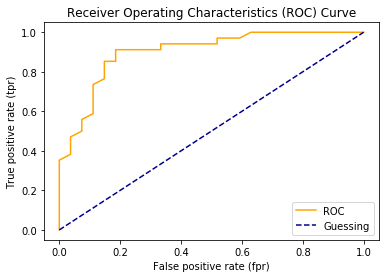

In [99]:
# Create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    '''
    Plots a ROC (Receiver Operating Characteristic) curve
    given the false postive rate (fpr)
    and true positive rate (tpr) of a model
    '''
    # Plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    # Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [100]:
from sklearn.metrics import roc_auc_score

# Area under curve
roc_auc_score(y_test, y_probs_positive)

0.9003267973856209

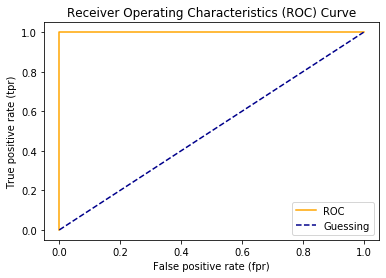

In [101]:
# Perfect ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [102]:
# Perfect AUC score
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the predicted label vs the true labels  
giving you an idea where the model is getting confused

In [103]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

# true labels, predictions
confusion_matrix(y_test, y_preds)

array([[22,  5],
       [ 5, 29]])

In [104]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, 
            y_preds, 
            rownames=['True labels'], 
            colnames=['Predicted Labels'])

Predicted Labels,0,1
True labels,,
0,22,5
1,5,29


In [105]:
# install 
import sys # access system
# ! = terminal
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.8.3
  latest version: 4.8.4

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



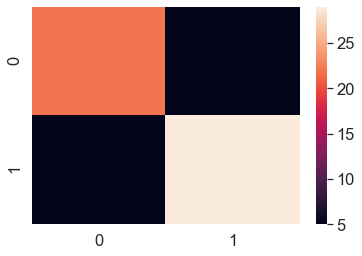

In [106]:
# Make our matrix more visual with seaborn's heatmap
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

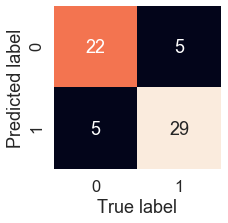

In [107]:
def plot_conf_mat(conf_mat):
    """
    Plots a confusion matrix using Seaborn's heatmao
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                     annot=True,
                     cbar=False)
    plt.xlabel('True label')
    plt.ylabel('Predicted label')

plot_conf_mat(conf_mat)

**Classification Report**

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        27
           1       0.85      0.85      0.85        34

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



* Precision: proportion of positive identifications (correct predictions). No false positives has precision = 1.0
* Recall: proportion of actually positives correctly classified. No false negatives has recall = 1.0
* F1-score: combination of precision and recall. Perfect model has F1-score = 1.0
* Support: number of samples each metric was calculated on
* Accuracy: The decimal accuracy of the model
* Macro avg: Macro Avergae, the average precision, recall, and F1 score between classes. Maro avg doesn't class imbalance into account, so if we have class imbalances, pay attention this metric.
* Weighted avg: Weighted average precision, recall, and F1 score betweenn classes. Weighted means each metric is calculated with respect to how many samples there are in each class. Whis metric will favor the majority class (out performs another due to having more samples).

In [109]:
# Where precision and recall become valuable
disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

/opt/miniconda3/envs/sample_project_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


precision, recall and f1-score help give a clearer picture

### 4.2.2 Regression model evaluation metrics

Model evaluation documentation: https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2 (r-squared) or coefficient determination => Similar to accuracy, but doesn't tell how wrong model is
2. Mean absolute error (MAE) => How far off os each prediction on average
3. Mean squared error (MSE) => Use if bigger errors are worse than smaller errors

**R^2**

Compares our models predictions to the mean of the targets. Values can range from negative infinity (poor model) to 1.  For example:  
If model only predicts the mean of the targets, its R^2 = 0.  
If a model perfectly predicts a range of numbers, its R^2 = 1

In [111]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(24)

X = boston_df.drop('target', axis=1)
y = boston_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor().fit(X_train, y_train)

# R^2 is the default score metric for RandomForestRegressor (regression)
model.score(X_test, y_test)

0.8090318492911783

In [115]:
# Test with labels as mean
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test), y_test.mean())
y_test.mean()    

21.772549019607844

In [116]:
r2_score(y_test, y_test_mean)

0.0

In [117]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error (MAE)**  
The average of the absolute differences between predictions and actual values.  
It gives you an idea of how wrong your models are

In [118]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.614696078431374

In [120]:
df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
368,50.0,35.971,-14.029
105,19.5,19.497,-0.003
269,20.7,21.323,0.623
119,19.3,19.360,0.060
351,24.1,27.208,3.108
...,...,...,...
100,27.5,25.875,-1.625
82,24.8,23.003,-1.797
226,37.6,47.633,10.033
416,7.5,10.909,3.409


In [134]:
absolute = np.absolute(df['differences'])
absolute.mean()

2.614696078431374

**Mean squared error (MSE)**

In [126]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

12.935252284313743

In [131]:
# Calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

12.935252284313743

#### Machine Learning Model Evaluation recap

**Classification Model Evaluation Metrics/Techniques**

* Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

* Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

* Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

* F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

* Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

* Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

* Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

* ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

* Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

**Which classification metric should you use?**

* Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

* Precision and recall become more important when classes are imbalanced.

* If false-positive predictions are worse than false-negatives, aim for higher precision.

* If false-negative predictions are worse than false-positives, aim for higher recall.

* F1-score is a combination of precision and recall.

* A confusion matrix is always a good way to visualize how a classification model is going.

**Regression Model Evaluation Metrics/Techniques**

* R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

* Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

* Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

* Which regression metric should you use?

* R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

* MAE gives a better indication of how far off each of your model's predictions are on average.

* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

    * Pay more attention to MAE: When being $10,000 off is twice as bad as being $5,000 off.

    * Pay more attention to MSE: When being $10,000 off is more than twice as bad as being $5,000 off.